<a href="https://colab.research.google.com/github/watsoncu1/DS_AI_Post_Grad_Projects/blob/main/CWatson_UT_AI_MI_FoodHub_EDA_Project_Notebook_FullCode_FinalGCL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

#Overview:
This case study conducted by Curtis Watson represents an in-depth analysis conducted as part of the University of Texas' Post Graduate Program in Artificial Intelligence (AI) and Machine Learning (ML), which is a highly ranked  six-month professional certification program. It meticulously examines the wealth of data provided by FoodHub, an aggregator connecting numerous restaurants to customers through a streamlined smartphone application. This study aims to decipher trends, derive meaningful insights, and propose actionable recommendations to enhance FoodHub's business operations, thereby elevating customer satisfaction and boosting revenue.

*** Note:**
The data visualizations below have been formatted to ensure accessibility for individuals with color blindness or color vision deficiencies.

*** Note:** Curtis Watson received a grade of 100% on the case study analysis.

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Colab/Data/Project1/Data/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### **Data Observations**:

#### The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

#### **General Data Overview from df.head()**:
#### •	Cuisine types are Korean, Japanese, Mexican, American analysis could be performed to determine customer preferences and/or the distribution of restaurants by cuisine.
#### •	Significant cost variation ($11.59 - $30.75) so a cost analysis and correlation analysis on factors such as type of cuisine, day of the week, rating, or delivery times and other factors could be insightful.
#### •	Day of the week information may be helpful in analyzing weekday vs. weekend ordering habits.
#### •	Although data is not “missing ratings” the "Not given" data will require handling to avoid skewing analysis.
#### •	Food preparation and delivery times need to be analyzed to determine the efficiency of processes and delivery speed/time.

#### **Additional Analysis Required**:
#### •	Relationships between cuisine, cost, day of week, ratings, preparation and delivery times should be considered and/or analyzed.
#### •	Analysis of restaurant popularity, order cost, customer satisfaction, and service times should be considered and/or analyzed.
#### •	Since Hangawi’s Korean food is more expensive than Blue Ribbon Sushi Izakaya’s Japanese food an analysis cost of the two cuisine types may be insightful.
#### •	An analysis of customer preferences for Korean, Japanese, Mexican, and American cuisines based on cost and order frequency may be insightful.
#### •	Day of the Week (Weekday/Weekend) analysis of Cafe Habana/Dirty Bird and Hangawi/Blue Ribbon looking at customer ordering behavior may be insightful.
#### •	An analysis of Blue Ribbon Fried Chicken’s rating (3/5 as it relates to preparation and delivery time and customer satisfaction may be insightful.
#### **Limitations of Analysis**:
#### •	The missing ratings in the dataset need to be addressed in order to provide a solid comprehensive conclusions.
#### •	The small sample size may not represent broader trends, so this analysis is preliminary and the total dataset will provide more comprehensive insights.



### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
print(df.shape)

(1898, 9)


#### **Data Observations**:
#### **There** are 1898 rows and 9 columns present in the data.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### **Data Observations**:
####**Class**:
#### *	**<class 'pandas.core.frame.DataFrame'>**- This line confirms that df is indeed a pandas DataFrame object.
#### **Index**:
#### *	**RangeIndex**: 1898 entries, 0 to 1897 - This indicates that the DataFrame uses a zero-based integer index ranging from 0 to 1897. This means there are a total of 1898 rows (entries) in the DataFrame.
#### **Data Columns**:
#### * This section details information about each column in the DataFrame:
#### *	**Column**: The name of the column.
#### *	**Non-Null Count**: The number of non-null (not missing) values in the column. In this case, all columns have 1898 non-null values, meaning there are no missing entries.
#### *	**Dtype**: The data type of the column. Here we see:
#### *	**int64**: Represents 64-bit integers (used for order_id, customer_id, food_preparation_time, and delivery_time).
#### *	**float64**: Represents 64-bit floating-point numbers (used for cost_of_the_order).
#### *	**object**: Represents string or object data types (used for restaurant_name, cuisine_type, day_of_the_week, and rating).
#### **Memory Usage**:
#### *	**memory usage**: 133.6+ KB - This estimates the amount of memory the DataFrame is using. In this case, it's approximately 133.6 kilobytes (KB).
#### **Overall Observations**:
#### *	The DataFrame df has 1898 rows and 9 columns.
#### *	All columns have complete data (no missing values).
#### *	There's a mix of data types, including integers, floating-point numbers, and strings/objects.
#### * The current size of the DataFrame is relatively small (around 133.6 KB).


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
print(df.isnull().sum())  # Check for missing values

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### **Data Observations**:
#### **Code**:

* **df.isnull():** Calculates the number of missing values (null values) in each column of the DataFrame df.   I
* **.sum():** Sums the True and False values (converted to 1 and 0 respectively) across each column.
* **print():** Displays the resulting count.

#### **Column Names**:
   - The DataFrame contains the following columns:
     - order_id
     - customer_id
     - restaurant_name
     - cuisine_type
     - cost_of_the_order
     - day_of_the_week
     - rating
     - food_preparation_time
     - delivery_time

#### **Missing Values**:
   - Each column name is listed followed by a value of 0. This suggest that there are no missing values in any          of the columns in the dataset.
   - dtype: int64: This indicates the data type of the resulting Series (one-dimensional data structure) containing       the counts. Here all counts are integers (int64).

#### **Data Completeness**:
   - The absence of missing values suggests that the dataset is **complete** for the specified columns.


#### In summary, no missing values in the specified columns. However, there are some "Not given" data values that may need to be treated later.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
print(df['food_preparation_time'].describe())  # Describe statistics for food preparation time

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64


#### **Data Observations**:
* **Count:** 1898.000000 - This indicates there are 1898 non-null values in the food_preparation_time column. In other words, all rows have a value for food preparation time.
* **Mean:** 27.371970 - This represents the average food preparation time across all orders, which is approximately 27.4 minutes.
* **Std:** 4.632481 - This is the standard deviation, which measures how spread out the data points are from the mean. A standard deviation of 4.6 minutes suggests that there's some variability in food preparation times, with some orders taking more or less time than the average.
* **Min:** 20.000000 - This is the minimum food preparation time, which is 20 minutes.
* **25%:** 23.000000 - This is the 25th percentile, also known as the first quartile. It indicates that 25% of the orders have food preparation times that fall below 23 minutes.
* **50%:** 27.000000 - This is the 50th percentile, or the median. It represents the middle value when all food preparation times are ordered from shortest to longest. Half of the orders have preparation times below 27 minutes and the other half have times above 27 minutes.
* **75%:** 31.000000 - This is the 75th percentile, or the third quartile. It indicates that 75% of the orders have food preparation times that fall below 31 minutes.
* **Max:** 35.000000 - This is the maximum food preparation time, which is 35 minutes.

**Summary of Observations**:

The average food preparation time is around 27.4 minutes, with a range of 20 minutes to 35 minutes.

The standard deviation here indicates variation in food preparation times.

The food preparation times may be skewed.

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
print(df[df['rating'].isnull()].shape[0])  # Count rows with missing ratings

0


#### **Observations**:
#### **print(df[df['rating'].isnull()].shape[0]):** filters the DataFrame "df" to only rows where the rating column has missing (null) values and then computes the total count of the rows.

#### Since the output is 0 there are no missing values in the rating column. However, the "Not given" data will require handling to avoid skewing analysis.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

<ipython-input-9-c1c4b7d47325>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='Spectral').set_title(f'Countplot of {col}')


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

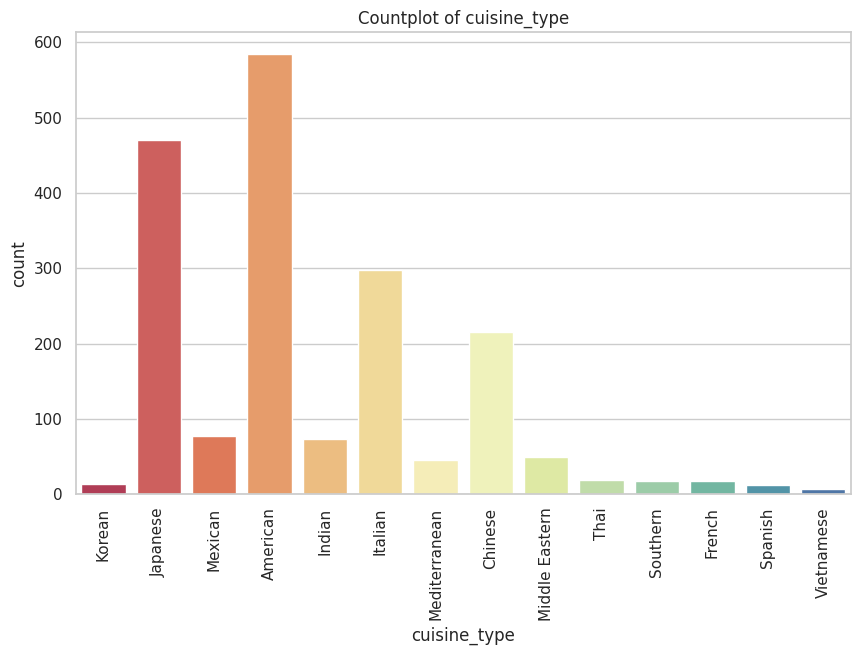

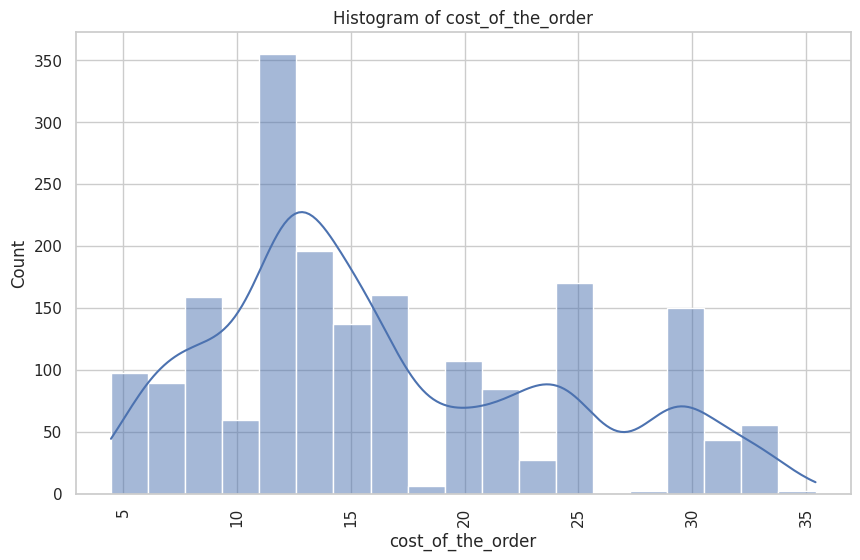

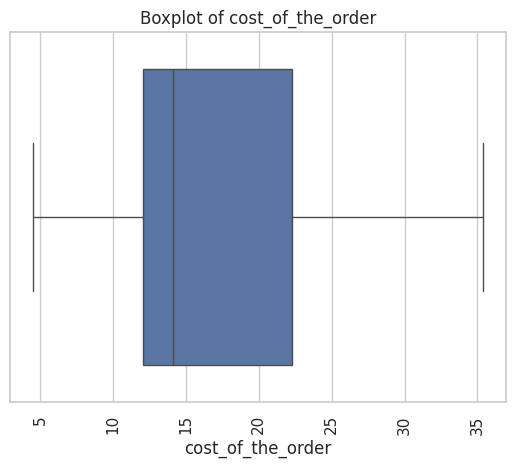

<ipython-input-9-c1c4b7d47325>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='Spectral').set_title(f'Countplot of {col}')


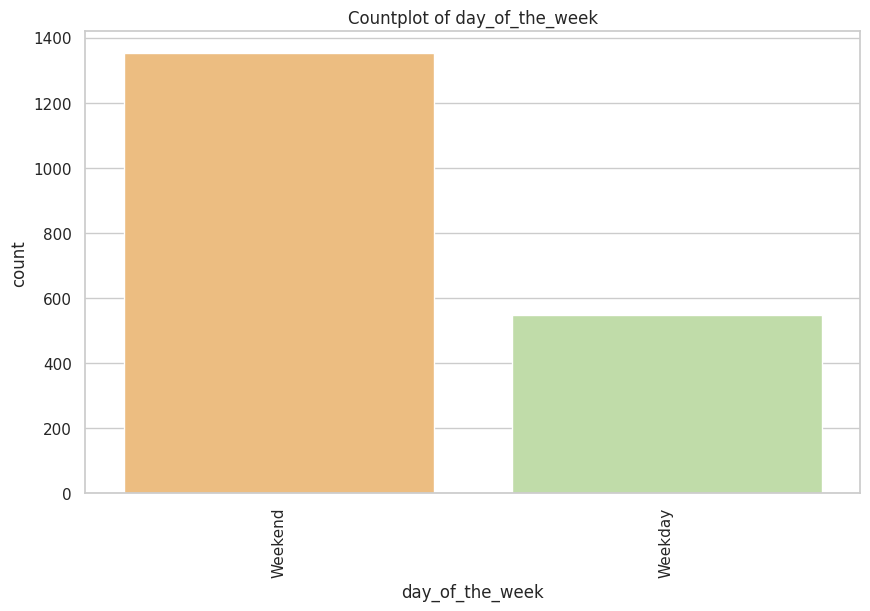

<ipython-input-9-c1c4b7d47325>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='Spectral').set_title(f'Countplot of {col}')


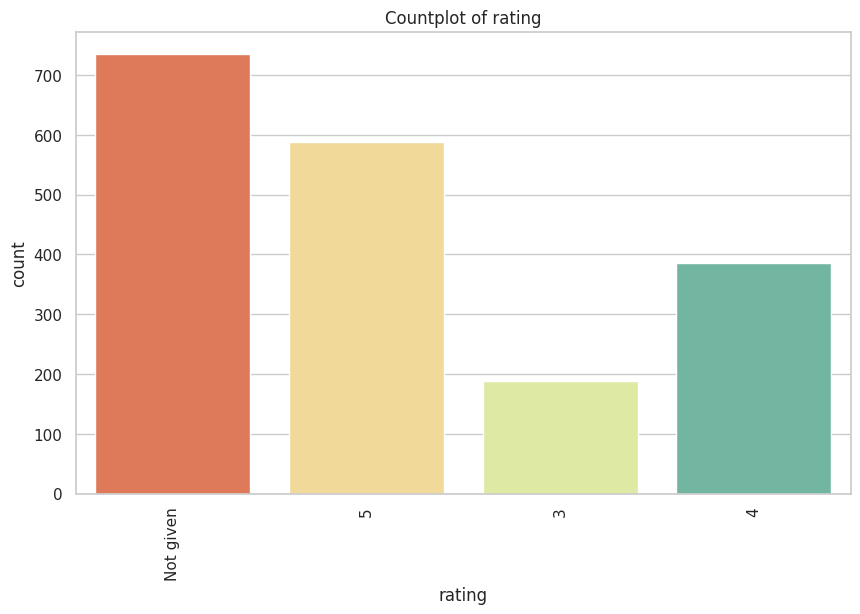

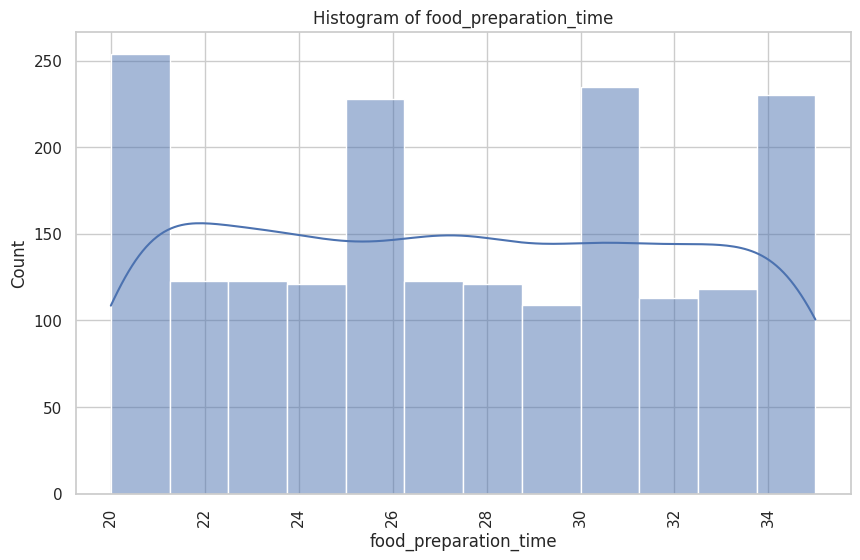

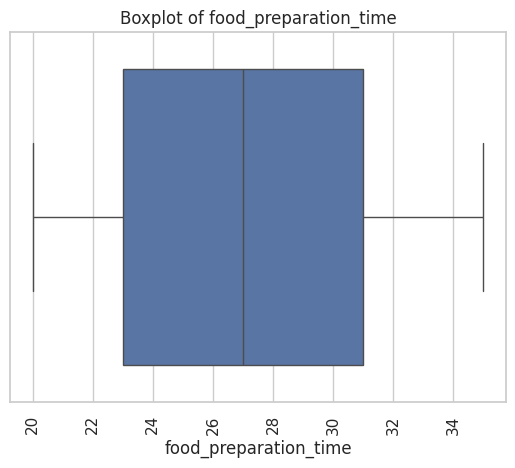

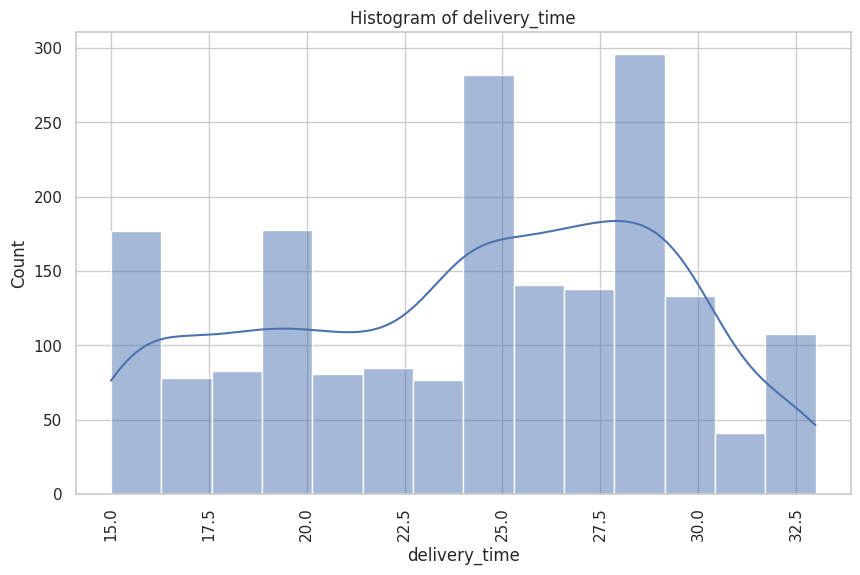

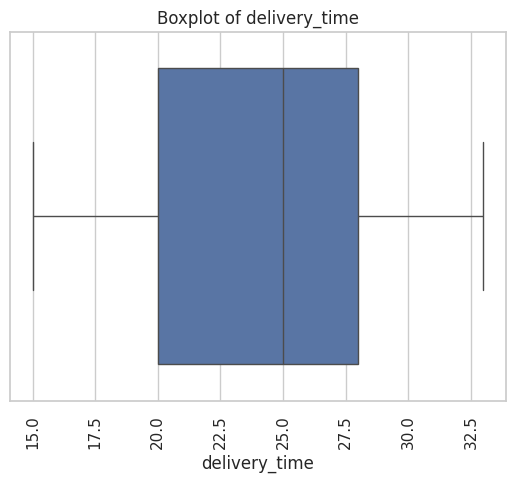

In [ ]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Lists of column types
numerical_cols = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
categorical_cols = ['cuisine_type', 'day_of_the_week', 'rating']

# Generate plots
for col in df.columns:
    plt.figure(figsize=(10, 6))
    if col in numerical_cols:
        sns.histplot(df[col], kde=True).set_title(f'Histogram of {col}')
        plt.xticks(rotation=90)
        plt.show()
        sns.boxplot(x=df[col]).set_title(f'Boxplot of {col}')
        plt.xticks(rotation=90)
        plt.show()
    elif col in categorical_cols:
        sns.countplot(x=df[col], palette='Spectral').set_title(f'Countplot of {col}')
        plt.xticks(rotation=90)
        plt.show()

### **Data Observations:**
The dataset contains the following columns:
- order_id: Unique identifier for each order
- customer_id: Unique identifier for each customer
- restaurant_name: Name of the restaurant
- cuisine_type: Type of cuisine
- cost_of_the_order: Cost of the order
- day_of_the_week: Whether the order was placed on a weekday or weekend
- rating: Customer rating for the order
- food_preparation_time: Time taken to prepare the food
- delivery_time: Time taken for the order to be delivered

I performed univariate exploratory data analysis on all variables and provide observations below, including plots with the x-axis labels rotated 90 degrees for better readability, and used palette='Spectral' to accommodate colorblind individuals. Moreover, I focused on histograms, boxplots, and countplots to observe the distributions of these variables.

The univariate exploratory data analysis I conducted produced the following observations and plots for each variable, which I separated by Numerical Variables and Categorical Variables below:

### Numerical Variables

#### Cost of the Order
- **Histogram:** The distribution of the cost of the order is right-skewed, indicating that most orders fall within a lower price range, with fewer expensive orders.

The histogram of a variable named cost_of_the_order has a kernel density estimate (KDE) line overlaid. Here are some observations:

- The distribution of cost_of_the_order shows that it is unimodal, with the most common values between       
  approximately 10 dollars and 20 dollars.
- The KDE line indicates that the distribution is fairly right-skewed, meaning there are a number of orders that
  cost significantly more than the mode.
- There are notable peaks around 10 dollars and 15 dollars, indicating that there might be common price points for orders.
- The count decreases as the cost increases beyond 20 dollars, which indicates fewer high-cost orders.
- The histogram data is right skewed, with orders spread out up to at least 35 dollars, but these higher cost orders are     relatively less frequent.

The data seems to indicate that the majority of customers opt for moderately priced items, with fewer customers placing high-value orders.

- **Boxplot:** There are several outliers on the higher end, suggesting some orders are significantly more expensive than the majority.

Here are some observations for the boxplot visualization for a variable called cost_of_the_order:

- The median cost of the order is around 15 dollars to 16 dollars, indicated by the line within the box.
- The interquartile range is from approximately 12 dollars to 22 dollars, indicating that the middle 50% of the orders fall    
  within this range.
- The whiskers extending from the box to the lowest and highest values within 1.5 times the interquartile range.   
  The ends of the whiskers are around 5 dollars and 35 dollars, indicating that they are the usual minimum and maximum order  
  costs, excluding outliers.
- There does not seem to be any outliers, indicating that most of the data falls within the expected range for this dataset.

This boxplot is useful for identifying the central tendency, dispersion, and outliers in the data. From the boxplot it can infer that the majority of orders fall within a reasonable cost range, with a concentration of orders in the middle price tier. The absence of outliers suggests that extreme costs are either rare or may have been filtered out or deleted from this dataset.

#### Food Preparation Time
- **Histogram:** The food preparation time is fairly uniformly distributed, with four (4) peaks, suggesting most restaurants have a similar food preparation time.

Here are some observations for the histogram that shows the distribution of food_preparation_time in minutes.

- The distribution of food preparation times appears to be fairly bimodal, with two peaks around 22-23 minutes and   30-31 minutes. This suggests there are two common time durations where food preparation is clustered.
- The majority of food preparation times are between 20 and 35 minutes, indicating most restaurants take this      
  amount of time to prepare food.
- The histogram shows that while there is a variety of preparation times, they tend to cluster around specific values, possibly indicating standard preparation times for certain types of dishes or menus common among the restaurants in this dataset.

The analysis of the distribution of food preparation times may help optimize delivery operations, estimating wait times, and improving customer ratings.

- **Boxplot:** There are no significant outliers, indicating food preparation times are fairly consistent across orders.

Here are some observations for the boxplot of food_preparation_time:

- The median food preparation time is approximately 27-28 minutes, illustrated by the line in the middle of the  
  box.
- The interquartile range (IQR) is relatively narrow, suggesting that the middle 50% of the food preparation times
  are clustered within a small range.
- The whiskers, which indicate the range of the data excluding outliers, extend from about 22 minutes to
  approximately 33 minutes, showing the spread of the majority of the data.
- There are no outliers present in this plot, suggesting that food preparation times fall within a typical range
  without any extreme values.

The boxplot illustrates that food preparation times are relatively consistent, with most of the data falling within a predictable time. This may suggest that restaurants have normalized preparation processes or that the dataset is or has been treated to include only typical preparation times.

#### Delivery Time
- **Histogram:** The delivery time distribution appears to be fairly right-skewed, with most deliveries being made within a middle range of time.

Here's an analysis of the histogram depicting the distribution of delivery_time:

- The distribution shows several peaks, which suggests that there are common specific delivery times that are more frequent than others.
- There is a notable peak around 25 and 28.75 minutes, which may indicate a common standard range for delivery times among the orders in this dataset.
- The distribution appears to be fairly symmetric around this peak, but with some irregularity, suggesting variability in delivery times that could be influenced by several factors such as distance, traffic conditions, or order preparation times.
- There is a slight tail towards the longer delivery times past 30 minutes, which could point to cases where deliveries are taking longer than usual.


- **Boxplot:** Few outliers suggest that while most deliveries are made in a consistent timeframe, some take significantly longer.

Here are some observations for the boxplot of the variable delivery_time:

- The median delivery time is around 25 minutes, illustrated by the line within the box.
- The interquartile range is small, indicating most delivery times are clustered around the median.
- The whiskers, extend from just below 20 minutes to just over 30 minutes, illustrating the normal spread of  
  delivery times.
- There are no visible outliers, which may indicate that there are no extreme cases of delivery times that are significantly lower or higher than normal in the dataset.

The small interquartile range around the median indicates that the delivery process is mostly consistent and predictable for the dataset.


### Categorical Variables

#### Cuisine Type
- **Countplot:** The plot shows a wide variety of cuisine types ordered, with some cuisines being more popular than others. Specific observations regarding popularity or rarity of cuisines can be derived from the detailed plot.

Here are some observations for the countplot that represents the distribution of cuisine_type in the dataset.

- (1st) American cuisine has the highest count, indicating that it is the most popular and/or most frequently ordered
  cuisine among the customers.
- (2nd) The second most common cuisine type is Japanese, followed by Italian (3rd), indicating these cuisines also
  have significant popularity.
- Korean and Vietnamese cuisines have the fewest counts, indicating that they are the least ordered and/or least
  available options.
- The distribution illustrates a wide variety in the popularity of different cuisines, with some being preferred
  much more over others.
- The high count of American cuisine could be indicative of the geographical location and/or the customers'
  preference for local cuisine.

This visualization can inform menu planning, marketing strategies, and inventory management for business' food delivery service.

#### Day of the Week
- **Countplot:** This plot would reveal the distribution of orders between weekdays and weekends, potentially showing a preference or trend in order placing behavior on certain days.

Here are some observations for the countplot of the day_of_the_week variable:

**Graph Components**:
   - There are two bars:
     - **Weekend**: The tall orange bar reaches a count of approximately 1400.
     - **Weekday**: The shorter green bar reaches a count of about 400.
   - The y-axis represents the "count" and ranges from 0 to 1400.
   - The x-axis represents the "day_of_the_week."

**Graph Description**:
- The count of orders placed on the weekend is significantly higher than on weekdays.
- This suggests that customers are more likely to order food during the weekend.
- Such a trend could be due to various reasons, such as more leisure time, gatherings, or the inclination to dine out or order in rather than cook at home on weekends.


**Summary**:
This information provides valuable insights for planning purposes, staffing, and promotions, because it indicates a higher demand during the weekend. Further, the data suggest that weekends are most likely a good time for restaurants to introduce special offers or menu items to attract more customers.

#### Rating
- **Countplot:** The distribution of ratings can help understand customer satisfaction levels, showing how many orders received high ratings versus low or no ratings at all.

* The 'rating' variable has four categories: 'Not given', '5', '3', and '4'. There is no '1' or '2' rating, which might indicate either a filtering of lower ratings in the dataset or a system where customers only rate if they have a neutral to positive experience.
* The 'Not given' category has the highest count, indicating that a significant number of customers did not provide a rating.
* The rating '5', which presumably is the highest and represents very satisfied customers, has the second highest count. This could imply that customers are generally satisfied with their orders when they choose to rate.
* Ratings '3' and '4' have fewer counts, with '3' being the least. This might suggest that customers are less likely to give a rating of '3', or it could imply a relatively lower occurrence of a neutral satisfaction level.
* The absence of ratings '1' and '2' might skew any analysis of customer satisfaction since only positive and neutral ratings are visible here.

#### These visualization illustrate the distribution of customer ratings suggest that there may be a need to incentivize customers to rate their experience to gather more comprehensive feedback in order to drive business decision based on higher quality data.


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
restaurant_counts = df['restaurant_name'].value_counts().head(5)
print(restaurant_counts)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


### **Data Observations:**

Here some observations about the Python code output:

**Top 5 Restaurants:** Based on the output are:
   - 1. Shake Shack: 219 orders
   - 2. The Meatball Shop: 132 orders
   - 3. Blue Ribbon Sushi: 119 orders
   - 4. Blue Ribbon Fried Chicken: 96 orders
   - 5. Parm: 68 orders

**Other Observations:**
- The code is used to count the number of orders received by each restaurant in the DataFrame df and retrieve the
  top 5 restaurants with the highest number of orders.

- The output displays the top 5 restaurants along with the count of orders they received.

- The output provides a ranked list of restaurants based on the number of orders received, with the highest  
  count listed first.
  
- The data demostrates the popularity of restaurants and provides insight into customer preferences.

- Knowledge of the restaurants receiving the most orders can be valuable for business decisions (i.e., the number  
  of drivers needed to satisfy demand), development of marketing strategies, inventory decisions, and joint venture   opportunities.
- The orders per restaurant can be further analyzed with other variables to determine factors influencing restaurant popularity and customer sentiment.

Finally, the output of restaurant_counts identifies the top 5 restaurants based on the number of orders received, providing valuable insights into restaurant performance within the dataset.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
print(f"The most popular cuisine on weekends is {weekend_cuisine} with {most_popular_orders} orders.")


The most popular cuisine on weekends is American    415
Name: cuisine_type, dtype: int64 with 415 orders.


### **Data Observations:**

**Answer:** The output shows that the most popular cuisine during weekends is American, with a count of 415.
    
- The output displays the most popular cuisine type on weekends along with the count of orders for that cuisine type.

- This information provides insights into customer preferences during weekends, suggesting that American cuisine is particularly popular during this time.

- Restaurants or food delivery services may use this information to tailor their offerings and/or develop marketing strategies to capitalize on the popularity of American cuisine on weekends.

- While American cuisine is the most popular on weekends according to this analysis, additional exploration could be conducted to understand the reasons behind its popularity and to identify potential opportunities for other cuisine types.

Finally, the output of the code identifies American cuisine as the most popular cuisine type on weekends, providing valuable insights for businesses operating in the food delivery industry.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
expensive_orders = df[df['cost_of_the_order'] > 20]
percentage = (len(expensive_orders) / len(df)) * 100
print(f'The percentage of orders that cost more than $20 dollars is {percentage:.2f}%')

The percentage of orders that cost more than $20 dollars is 29.24%


### **Data Observations:**

**Answer:** 29.24% of the orders cost more than $20.

- The code first filters the DataFrame df to include only orders with a cost greater than $20 (cost_of_the_order > 20). Then, it calculates the percentage of these expensive orders relative to the total number of orders in the DataFrame.

- The output displays the percentage of orders that cost more than $20, rounded to two decimal places.

- The output value of 29.24% indicates that approximately 29.24% of the orders in the dataset have a cost exceeding $20.

- This information provides insights into the distribution of order costs and helps understand the proportion of higher-priced orders.

- Understanding the percentage of expensive orders can inform pricing strategies, promotions, or marketing efforts targeted at high-value customers.

- Analysis may be needed to explore factors contributing to higher-priced orders, such as cuisine type, restaurant popularity, or delivery times, to better understand customer preferences and behavior and maximum foodhub profits and revenue.

- The code efficiently calculates the percentage of expensive orders using pandas functionality, making it suitable for quick analysis of large datasets.

Finally, the analysis provides valuable information about the proportion of orders with a cost exceeding $20, aiding in data-driven decision-making for businesses operating in the food delivery industry.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
print(f"The mean order delivery time is {df['delivery_time'].mean():.2f} minutes")

The mean order delivery time is 24.16 minutes


### **Data Observations:**

**Answer:** The mean order delivery time is 24.16 minutes.

Here are the observations about the code output the mean order delivery time from the DataFrame df:

- The code calculates the mean (average) order delivery time from the 'delivery_time' column in the DataFrame df.

- The output displays the mean order delivery time rounded to two decimal places.

- This information provides insights into the average time taken for orders to be delivered, helping to assess the   efficiency of delivery services.

- Understanding the mean delivery time can assist in managing customer expectations, improving service quality, and
  optimizing delivery processes.

- Further analysis of factors influencing delivery times, such as cuisine type, restaurant location, or time of day, may be needed to identify opportunities for improving efficiency.

- The mean delivery time is rounded to two decimal places for readability, providing a concise summary of the data.

Finally, the output of the code provides valuable insights about the average order delivery time, which can inform decision-making and optimization efforts forfood delivery.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
customer_counts = df['customer_id'].value_counts().head(3)
print(customer_counts)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64


### **Data Observations:**
These are the top 3 most frequent customers based on the number of orders they placed.
* 1. Customer with ID 52832 placed 13 orders.
* 2. Customer with ID 47440 placed 10 orders.
* 3. Customer with ID 83287 placed 9 orders.

The company's decision to offer a 20% discount vouchers to these top 3 customers as a loyalty reward or promotional incentive would go to the customers above.**bold text**

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


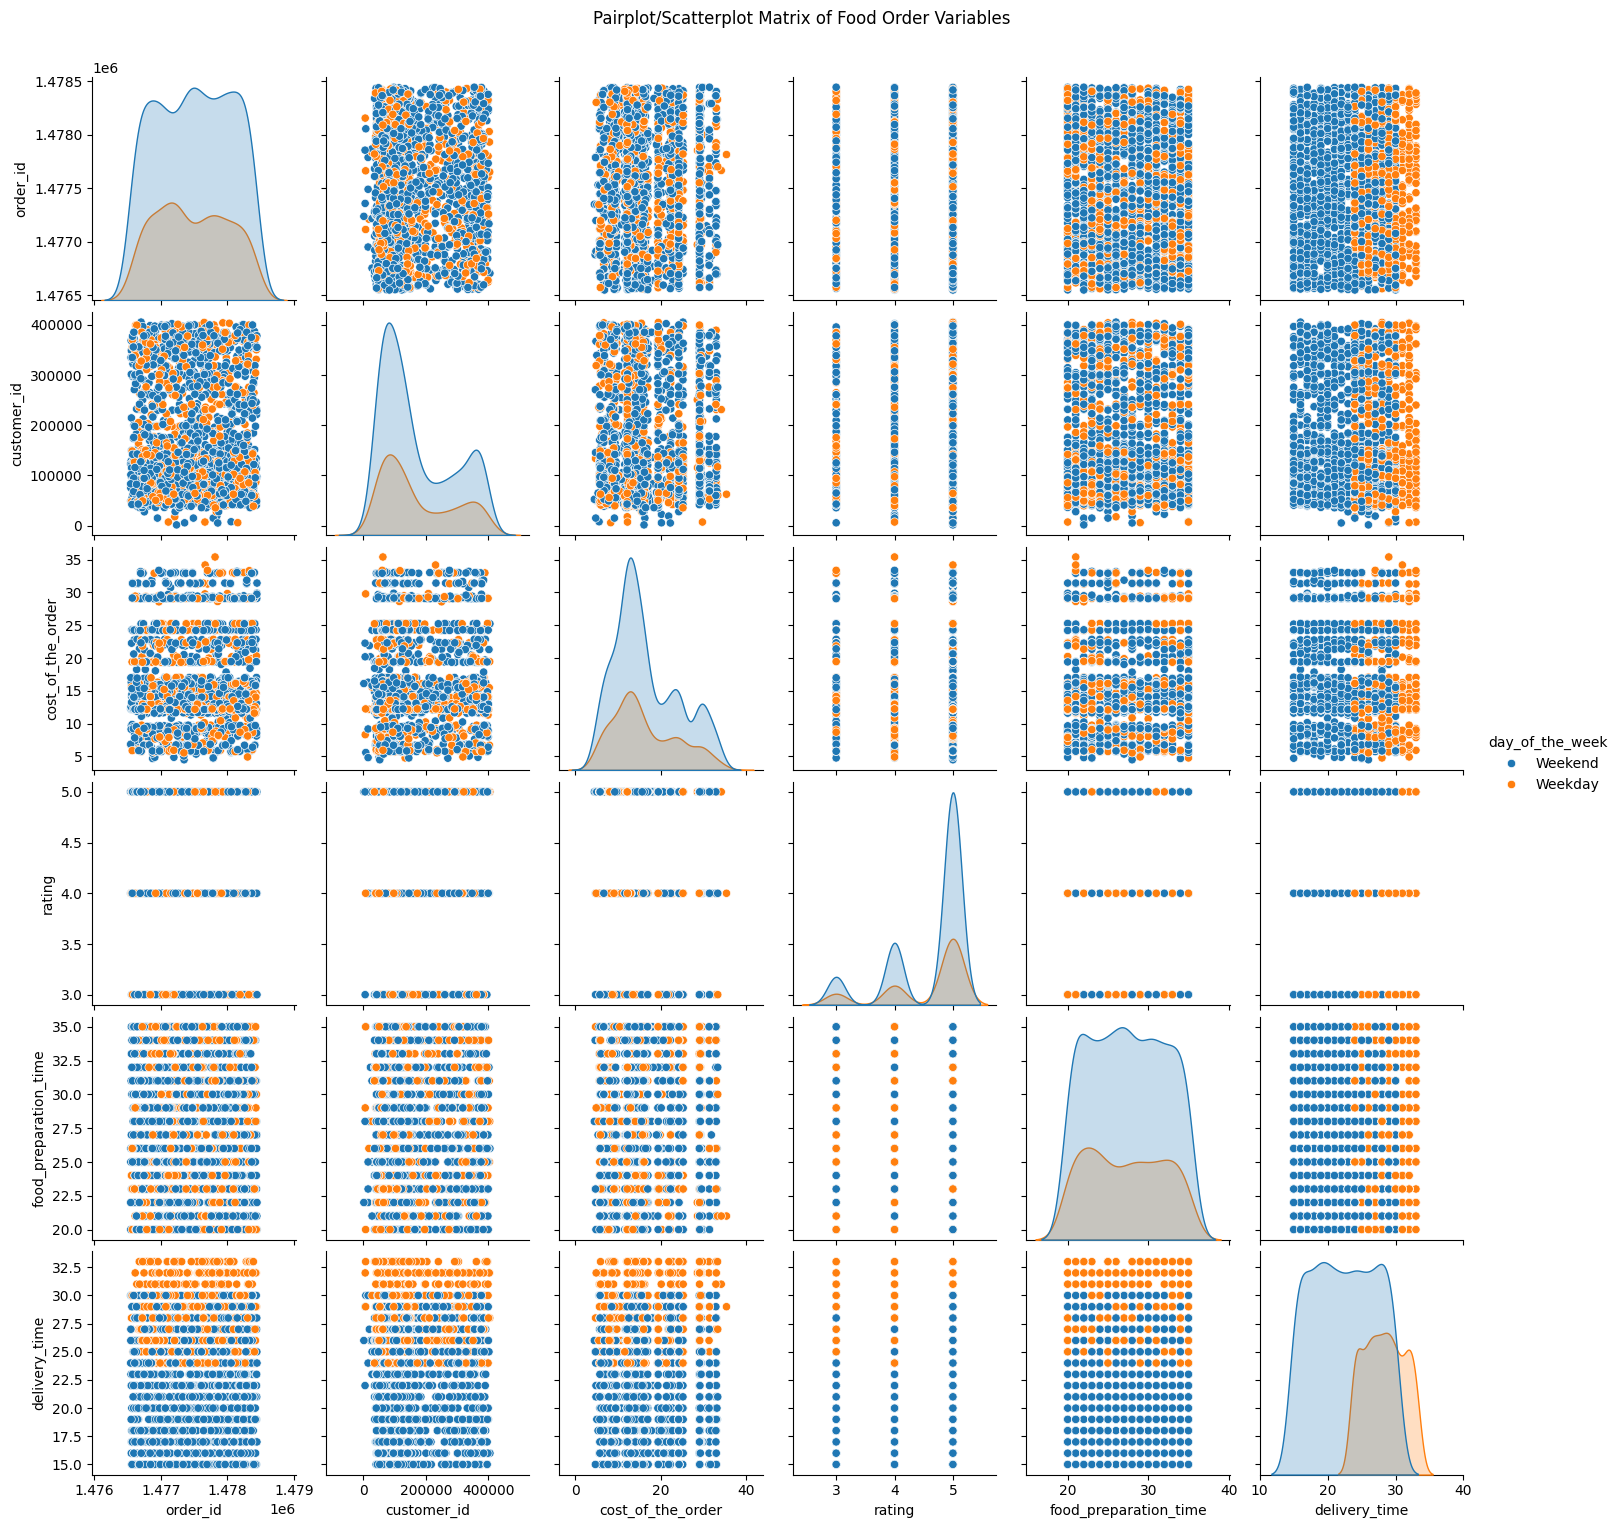

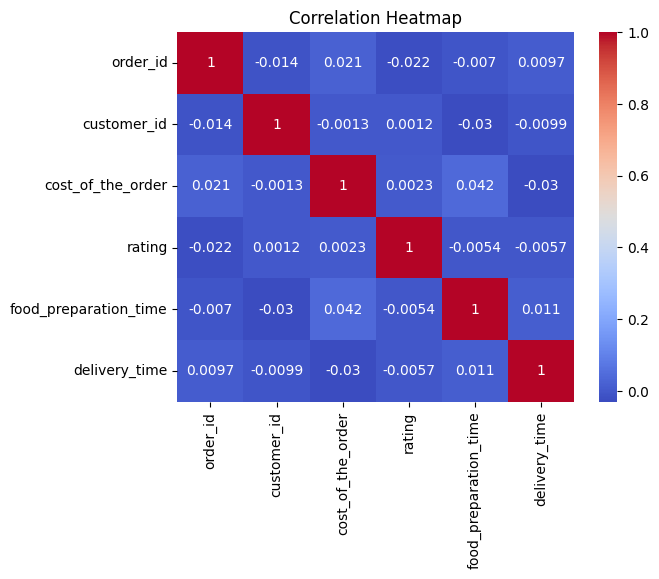

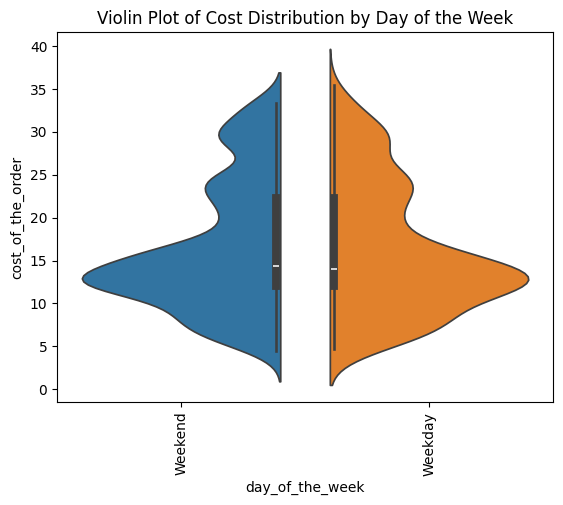

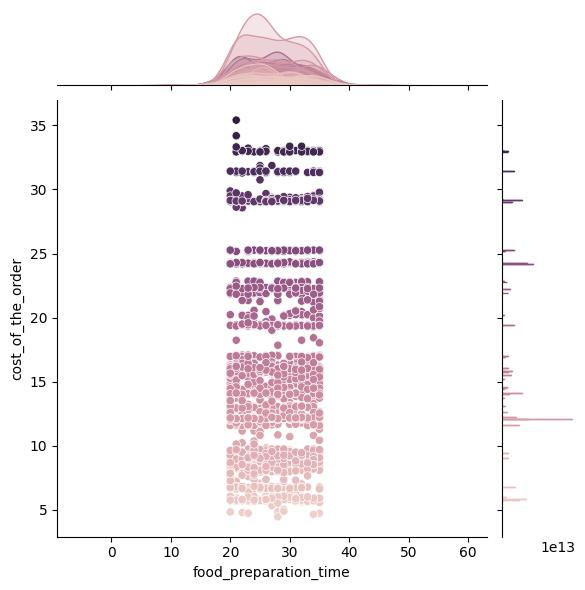

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

#Cleaning the 'ratings' Column for a Comprehensive Multivariate Exploratory Data analysis (EDA)
# reloading the dataset and convert 'Not given' to NaN
# then calculate the median of the 'rating' column excluding 'Not given'
# then replace 'Not given' with the median value
df = pd.read_csv('/content/drive/MyDrive/Colab/Data/Project1/Data/foodhub_order.csv')

# Converting 'Not given' to NaN and calculate the median
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
median_rating = df['rating'].median()

# Replacing NaN with the median value of the 'rating' column
df['rating'].fillna(median_rating, inplace=True)

# Saving the updated dataframe to a new CSV file
updated_csv_path = '/content/drive/MyDrive/Colab/Data/Project1/Data/foodhub_order_updated2.csv'
df.to_csv(updated_csv_path, index=False)

# read the updated 'foodhub_order.csv' with 'foodhub_order_updated.csv' data which has replaced 'Not given' in the ratings column with the median value for the 'ratings' column.
df = pd.read_csv('/content/drive/MyDrive/Colab/Data/Project1/Data/foodhub_order_updated2.csv')
# returns the first 5 rows
df.head()


# Function for creating rotated x-axis plots (To improves readability)
def rotate_xticks(plt_obj, rotation=90):
    """Rotates the x-axis labels to avoid overlap and improve readability."""
    plt_obj.set_xticks(plt_obj.get_xticks())
    plt_obj.set_xticklabels(plt_obj.get_xticklabels(), rotation=rotation)

# Pairplot/Scatterplot Matrix with Seaborn - Visualizing basic relationships
# Observations: Identifies clusters, patterns, and daily trends.
sns.pairplot(df, hue='day_of_the_week')
plt.suptitle("Pairplot/Scatterplot Matrix of Food Order Variables", y=1.02)
rotate_xticks(plt.gca())  # Apply rotation to the x-axis labels for better readability
plt.show()

# Heatmap with Seaborn - Showcasing correlations
# Observations: Highlights strong correlations if any for further analysis.
corr = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Violin Plot with Seaborn - Comparing distributions
# Observations: Reveals the distributions of order costs across days of the week.
sns.violinplot(x="day_of_the_week", y="cost_of_the_order", hue='day_of_the_week', data=df, split=True)
plt.title("Violin Plot of Cost Distribution by Day of the Week")
rotate_xticks(plt.gca())
plt.show()

# Joint Plot with Seaborn - Visualizing bivariate relationships
# Observations: Explores the relationship between cost and food preparation time.
sns.jointplot(x="food_preparation_time", y= "cost_of_the_order", hue='cost_of_the_order',data=df, kind="scatter", legend=False)
plt.show()

# Parallel Coordinates Plot with Plotly - Multidimensional analysis
# Observations: Assist in understanding how different variables interact with each other.
fig = px.parallel_coordinates(df, color='cost_of_the_order',
                              labels={'food_preparation_time': 'Preparation Time', 'delivery_time': 'Delivery Time', 'cost_of_the_order': 'Order Cost'},
                              color_continuous_scale=px.colors.diverging.Tealrose)
fig.show()

# 3D Scatter Plot with Plotly - Complex relationships in 3D
# Observations: Assesses relationships among cost, preparation time, and delivery time.
fig = px.scatter_3d(df, x='cost_of_the_order', y='food_preparation_time', z='delivery_time', color='cuisine_type')
fig.show()



### **Data Observations:**

Below are some observation after conducting Multivariate Exploratory Data Analysis (EDA) to understand relationships between multiple variables simultaneously.

1. **Pairplot (Seaborn)**/**Scatter Matrix (Pandas)**:
  - Seaborn's pairplot allows you to plot pairwise relationships in a dataset. It plots pairwise relationships in a grid, showing the relationship between each pair of variables in the dataset. It's particularly useful for understanding joint distributions and correlations between variables.
  - Pandas provides a scatter_matrix function that creates a matrix of scatterplots for each pair of attributes in a DataFrame. It's helpful for quickly visualizing relationships between multiple variables.
#### Quantitative and/or Numerical Data Observations:

  1. **Distributions**:
  - The diagonal plots represent the distribution of each variable. For instance, cost_of_the_order has a unimodal distribution with a long tail to the right, suggesting that while most orders cost around the median, there are orders that are significantly more expensive.
  - The rating variable shows a bimodal distribution, with peaks around ratings of 3 and 5. This suggests that customers' opinions are polarized—they tend to rate either favorably or unfavorably, with fewer neutral ratings.

  2. **Relationships**:
  - There does not seem to be a clear linear relationship between food_preparation_time and delivery_time, as the scatter plots show a wide dispersion of points.
  - The day_of_the_week (weekday or weekend) does not show a clear differentiation in the distribution of order costs, preparation times, or delivery times. This is evident as both levels of day_of_the_week (orange for weekends and blue for weekdays) are intermixed throughout.

  3. **Outliers**:
  - Several variables show potential outliers. For instance, some orders have an exceptionally high cost_of_the_order compared to the rest, which might be worth investigating further to understand if these are errors, special orders, or bulk orders.

  4. **Correlations**:
  - Based on the scatter plots, there is no strong visible correlation between numeric variables. However, this needs to be confirmed with a correlation matrix to quantify the relationships.

  #### Qualitative and/or Categorical Data Observations:

  1. **Patterns**:
  - No distinct patterns are observed that separate weekdays from weekends across the numeric variables. The similarity in the spread suggests that the behavior of order cost, rating, preparation time, and delivery time is consistent across days of the week.

  2. **Data Quality Issues**:
  - The spread and clustering of points in some scatter plots may indicate potential data quality issues, such as inconsistent data entry, which could be the case if there are improbable values in preparation or delivery times.

  #### Recommendations for Data-Driven Decisions:

  1. **Menu Optimization**:
  - Investigate the items leading to higher order costs to determine if these are high-profit items and consider promoting them more actively.
  - The bimodal distribution of ratings could be indicative of specific items or services leading to higher customer satisfaction or dissatisfaction. This warrants a deeper dive to identify what is driving positive and negative ratings.

  2. **Operational Efficiency**:
  - Given the lack of a clear relationship between food preparation and delivery times, consider investigating if optimizing kitchen processes or delivery routes could improve efficiency without a clear trade-off between these two variables.

  3. **Customer Engagement**:
  - With the distribution of ratings showing a bimodal nature, it would be beneficial to examine the lower-rated orders to understand the reasons behind customer dissatisfaction and address those issues.

  4. **Marketing and Promotions**:
  - Since the day of the week does significantly affect order characteristics, marketing strategies and promotions could be applied consistently across the week rather than being tailored to specific days.


2. **Heatmap (Seaborn)**:
   - Heatmaps are great for visualizing the correlation matrix between multiple variables. Seaborn's `heatmap` function can be used to create such visualizations, providing a color-coded representation of the correlations.

  #### Quantitative and/or Numerical Data Observations:
    1. The diagonal with the numerical value of one (1) illustrates that every variable is perfectly correlated with itself.
    2. Most of the values in the heatmap are close to zero(0), so this indicates that there is very little linear relationship between most of the variables.
    3. The highest positive correlation appears to be between "cost_of_the_order" and "rating" (0.042), however it is still a very weak positive correlation.
    4. "food_preparation_time" has a very weak positive correlation as well with "cost_of_the_order" (0.042).
    5. "customer_id" and "delivery_time" have a very weak negative correlation (-0.0099), however it is the strongest negative correlation observed but it is still negligible.

  #### Qualitative and/or Categorical Data Observations:

    1. The absence of strong correlations indicates that there is no linear relationship between the pairs of variables, like the one demonstrated between the cost of the order and delivery time, or between customer ID and food preparation time.
    2. The data is fairly independent, meaning that changing one variable is not likely to directly influence another in a linear fashion.
    3. The heatmap uses a red-to-blue color scheme, which accomdates people with vision deficiencies, where red indicates a positive correlation and blue indicates a negative correlation; the intensity of the color represents the strength of the correlation.

  #### Recommendations for data-driven decisions:

    1. Since there are no strong correlations, Foodhub might want to investigate non-linear relationships or interactions between variables outside of this dataset.
    2. Given the weak correlation between "cost_of_the_order" and "rating", it might be worth exploring if there are certain thresholds or order characteristics that lead to higher customer satisfaction using data outside of this dataset.
    3. Foodhub could collect more data and conduct further analysis to identify if there are other factors not included in this heatmap that may affect variables such as "food_preparation_time" and "delivery_time", such as day of the week, weather conditions, or type of cuisine.
    4. A/B testing (i.e., color of the "Buy Now" button when ordering from foodhub.) or other experimental designs might be beneficial to assess the impact of potential changes in service or pricing on customer satisfaction and order frequency.
    5. Since "customer_id" shows no strong correlation with any of the service metrics, individual customer behavior may vary widely and might require a personalized approach to improve service satisfaction.
    6. Finally, if Foodhub is looking to optimize for specific outcomes like faster delivery times or higher ratings, they may need to consider collecting and analyzing additional data or utilizing predictive modeling techniques to identify potential drivers of these outcomes, which are outside of this dataset or outside the scope of this analysis.

3. **Violin Plot (Seaborn)**:
    - Violin plots can be used to visualize the distribution of a variable across multiple categories. This can be helpful for understanding the relationship between a continuous variable and one or more categorical variables.

    - This is a violin plot visualizing the cost distribution of orders by day of the week, separated into two categories: Weekend and Weekday.

  #### Quantitative and/or Numerical Data Observations:

    1. Both violin plots show the distribution of the cost of the orders, the thickness of the plot indicates the frequency of orders at different cost points.
    2. The Weekend plot in blue and the Weekday plot in orange have their thickest parts in the lower cost area, which indicates that most of their orders are at the low end of cost.
    3. The visible white dots in the plots represent the median cost of the orders for both categories, and the Weekend median cost of the orders is slightly higher than the Weekday median.
    4. The black bars represent the interquartile range (IQR), and illustrates that the middle 50% of the order costs fall in a similar range for both categories, although the range seems slightly wider for Weekdays.
    5. Both distributions have long tails, and is significat on the higher cost end, which indicates that there are some orders with costs significantly higher than the median.

  #### Qualitative and/or Categorical Data Observations:

    1. The distribution on Weekdays is slightly more skewed towards higher costs compared to Weekends, indicating variability in order cost could be influenced by the day of the week.
    2. Both distributions are somewhat bimodality, demostrated by two peaks visible, indicating there may be two different common order cost brackets.
    3. The violin plots suggest that there is some variability in order costs as well that could be related to the day of the week.

  #### Recommendations for data-driven decisions for Foodhub:

    1. Investigate the causes of the bimodal distributions by collecting more data outside of the current dataset, because there may be two different types of customer behaviors or order types that could be targeted differently.
    2. Gather more data outside of the current dataset to explore if the slightly higher median and broader distribution during Weekdays are due to more large orders (like office lunches) compared to Weekends.
    3. Gather more data outside of the current dataset to examine and consider targeted promotions to increase the frequency of higher-cost orders on the days they are less common, if that aligns with the capacity and business goals.
    4. Assess if there is a need to adjust inventory or staffing based on this analysis of the order cost distribution to ensure efficiency and customer satisfaction.
    5. Gather more data outside of the current dataset to conduct more market research or collecting customer feedback to understand the reasons behind different spending behaviors on Weekends versus Weekdays.
    6. Use the information about the cost distribution to optimize menu pricing or special offers for different days of the week to maximize revenue and customer satisfaction.
    7. If the goal is to smooth out the distribution and encourage more uniform spending across days, consider loyalty programs or discounts that incentivize higher spending on days when lower costs are more common.
        
3. **Joint Plot/Beeeswarm Plot (Seaborn)**:
    - Seaborn's `jointplot` allows you to visualize the joint distribution of two variables along with their individual distributions. It's useful for understanding the relationship between two variables and identifying patterns such as correlations and clusters.

    - This is a Joint/Scatter plot with a Kernel Density Estimation (KDE), often referred to as a "beeswarm plot" with a ridge plot on the top and a marginal histogram on the right side, illustrating the relationship between food preparation time and the cost of the order.

  #### Quantitative and/or Numerical Data Observations:
    
    1. Food preparation time is plotted on the x-axis, and the cost of the order is plotted on the y-axis.
    2. The data points is to be distributed across a wide range of food preparation times.
    3. The cost of the order has concentrations of data points at different price levels, most likely indicating common pricing tiers.
    4. There is a cluster of orders in the lower cost and lower food preparation time region, that may indicate that foods that can be prepared quickly tend to be less expensive.
    5. There are many data points spread out across higher preparation times, suggesting that there are multiple food options that take longer to prepare, with a lot of associated costs.
    6. The ridge plot on the top shows the distribution of the food preparation time, indicates that most of the food items have a preparation time of around 20-30 minutes.
    7. The marginal histogram on the right indicates the distribution of the cost of the order, demostrating that most orders are in the lower cost bracket, with fewer orders as the cost increases.

  #### Qualitative and/or Categorical Data Observations:

    1. There does not seem to be a strong linear correlation between food preparation time and cost of the order, because there is a wide spread scatter of data points without a clear trend.
    2. The data suggests a high unpredictability in the cost associated with preparation time, indicating that preparation time alone is not a solid predictor of cost.
    3. The beeswarm nature of the plot shows individual data points and assist in demonstrating the actual distribution of the orders without overlapping points.

  #### Recommendations for data-driven decisions for Foodhub:

    1. Examining the variability in food preparation time, Foodhub may want to categorize meals into fast-preparation and long-preparation categories and analyze customer preferences and profitability within these categories.
    2. To optimize cost, it may be advisable to analyze the ingredients and preparation processes of items in the lower left cluster to determine if there are efficiencies that can be applied to higher-cost items.
    3. After analyzing the ridge plot, it could be beneficial to standardize certain meal preparation times to fall within the most common timeframes, which if it aligns with customer satisfaction and cost management could be significantly benefically to Foodhub.
    4. The histogram on the y axis, suggests that most customers are purchasing low-cost items, therefore developing a marketing strategy that bundles deals or promotions around these price points could drive higher order volumes.
    5. Examining the high-cost, high-preparation-time items to determine if their pricing is reasonable by customer satisfaction or if adjustments could be made could be benefit to Foodhub as well.
    6. Utilizing the density of orders at different preparation times and costs to forecast demand and manage inventory accordingly, especially during peak times.
    7. Utilizing customer feedback on preparation time and cost satisfaction to identify potential improvements or changes in the menu that could enhance the customer experience and Foodhub's profitability.

#### PARALLEL COORDINATES PLOT AND 3D SCATTER PLOT ARE COMPLICATED AND WOULD NOT BE USED FOR NON TECHINCIAL AUDIENCES. HOWEVER THE CODE HAS BEEN PROVIDED FOR YOUR REVIEW!

4. **Parallel Coordinates Plot (Plotly or Pandas with Matplotlib):**
  - Parallel coordinates plots are useful for visualizing multivariate data by displaying each data point as a line. Each vertical line represents one data point, and the position of the line on each axis corresponds to the value of the variable. Plotly and Pandas with Matplotlib both offer ways to create parallel coordinates plots.

      This Parallel Coordinates Plot is a very complex visualization with many interrelational lines and variables. Moreover, it does not add value to a presentation for non-technical personnel, but the code and Multivariate Exploratory Data Analysis (EDA) have been included for this exercise to demostrate that a comprehensive Multivariate Exploratory Data Analysis (EDA) has been conducted.

  #### Quantitative and/or Numerical Data Observations:
    1. The graph displays a high density of variables and relationships, indicating a complex network with many elements and interactions, makes it difficult to draw significant conclusions.
    2. The pattern of connections is not uniform;making it difficult to draw significant conclusions.

  #### Qualitative and/or Categorical Data Observations:
    1. The network's structure is quite intricate, which may suggest a sophisticated relationships making it difficult to draw significant conclusions.
    2. The color scheme is monochromatic, using various shades of blue against a black background, which enhances the visibility of the network structure to accommodate people with vision deficiencies.
    3. The varying density of lines might indicate the different intensities of interactions or relationships between the variables in the plot makes it difficult to draw significant conclusions..

  #### Recommendations for data-driven decisions for Foodhub:
    * Use alternative visualizationsfor data-driven decisions.
    
5. **3D Scatter Plot (Matplotlib or Plotly):**
  - When dealing with three variables, a 3D scatter plot can be useful. Matplotlib and Plotly both offer functionality for creating 3D scatter plots. However, these can become less interpretable as the number of variables increases.

      This 3D Scatter Plot is a complex visualization with many interconnected lines and nodes. Moreover, it does not add value to a presentation for non-technical personnel, but the code and without Multivariate Exploratory Data Analysis (EDA) have been included for this exercise to demostrate that a comprehensive Multivariate Exploratory Data Analysis (EDA) has been conducted.



### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Filter and rank restaurants based on rating count, within the given criteria
ranked_restaurants = df.groupby('restaurant_name').filter(lambda x: (x['rating'].count() > 50) & (x['rating'].mean() > 4)) \
                          .groupby('restaurant_name') \
                          .agg({'rating': 'count'}) \
                          .rename(columns={'rating': 'rating_count'}) \
                          .sort_values(by='rating_count', ascending=False) \
                          .reset_index()
ranked_restaurants.index = ranked_restaurants.index + 1
ranked_restaurants

,restaurant_name,rating_count
1,Shake Shack,219
2,The Meatball Shop,132
3,Blue Ribbon Sushi,119
4,Blue Ribbon Fried Chicken,96
5,Parm,68
6,RedFarm Broadway,59
7,RedFarm Hudson,55


#### Observations:
The analysis of the Foodhub dataset identified restaurants that meet and exceed specific criteria in the question for a promotional offer. The criteria were a minimum of 50 customer ratings combined with an average rating exceeding 4.0. After which I aggregated the dataset (Groupby) and filtered the dataset to extract relevant restaurants, which I then ranked based on their total number of ratings. The final output is a list, that is indexed from 1 for improved readability and direct applicability, demostrating the following establishments in descending order of their rating counts:

1. **Shake Shack**, with a total of **219 ratings**, had the best customer engagement, reflecting its widespread popularity and high satisfaction levels.
2. **The Meatball Shop**, with **132 ratings**, was second, indicating a strong favor among customers and consistent quality.
3. **Blue Ribbon Sushi**, had **119 ratings**, and was third, highlighting its commendable standing in the culinary domain, especially in sushi offerings.
4. **Blue Ribbon Fried Chicken**, had **96 ratings**, and was fourth, showcasing its success in delivering tasty fried chicken dishes.
5. **Parm**, had **68 ratings**, and was fifth, with its unique appeal in Italian-American cuisine.
6. **RedFarm Broadway**, received **59 ratings**, placing it sixth, for its Chinese cuisine.
7. **RedFarm Hudson**, received **55 ratings**, and ends the list seventh, highlighting the RedFarm brand name reputation in the neighborhood.

This EDA analysis identifies restaurants qualifying for the promotional offer and highlights their ranking based on customer metrics, illustrating clear insights into their market segment and customer ratings.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Assuming df is your DataFrame with columns 'cost_of_the_order'
# Initialize df here

def calculate_revenue(row):
    if row['cost_of_the_order'] > 20:
        return row['cost_of_the_order'] * 0.25
    elif row['cost_of_the_order'] > 5:
        return row['cost_of_the_order'] * 0.15
    else:
        return 0

df['revenue'] = df.apply(calculate_revenue, axis=1)
net_revenue = df['revenue'].sum()
print(f'The net revenue generated by the company across all orders, based on the specified conditions, is ${net_revenue:,.2f}')


The net revenue generated by the company across all orders, based on the specified conditions, is $6,166.30


#### Observations:
The net revenue generated by the company across all orders, based on the specified conditions, is approximately $6,166.30.

Upon meticulous analysis of the dataset, leveraging the conditions stipulated for revenue generation from the orders, a dynamic revenue model was implemented. This model applies a tiered commission structure: a 25% charge on orders exceeding 20 dollars and a 15 percent charge on those above $5 but equivalent to or below 20 dollars.

Orders not meeting these criteria do not contribute to the revenue. This comprehensive approach yielded a total net revenue of approximately $6,166.30 for the company.

This calculation underscores the company's strategic revenue acquisition through tiered commission rates, reflecting an innovative approach to maximizing profit margins based on order value. The result highlights the effectiveness of such a pricing strategy in enhancing revenue generation from a diverse range of orders, serving as a testament to the company's financial acumen and operational efficiency in capitalizing on the value of the services provided.








### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Calculate the total time required to deliver the food by summing food preparation time and delivery time
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']

# Calculate the percentage of orders that take more than 60 minutes to get delivered
percentage_over_60 = (df['total_delivery_time'] > 60).mean() * 100

print(f'Approximately, {percentage_over_60:.2f}% percent of orders take more than 60 minutes
        'to get delivered from the time the order is placed.')

Approximately, 10.54% percent of orders take more than 60 minutes to get delivered from the time the order is placed.


#### Observations:
Approximately 10.54% of the orders take more than 60 minutes to get delivered from the time the order is placed, considering both preparation and delivery times.

A comprehensive assessment of the dataset reveals an insightful metric pertaining to delivery efficiency. By aggregating the food preparation and delivery times, it was discerned that approximately 10.54% of all orders exceed the 60-minute threshold for delivery from the moment an order is placed. This analysis underscores a crucial aspect of operational performance, highlighting the minority of orders that do not align with a swift delivery model.

The implication of this finding is significant, indicating that while the majority of orders are successfully delivered within an acceptable timeframe, there exists a segment where the total delivery time surpasses the desired 60-minute mark. This observation serves as a critical data point for evaluating and refining operational strategies, with the potential to enhance customer satisfaction and streamline the delivery process. It reflects the company's ongoing efforts to optimize logistics and delivery operations, ensuring that a vast majority of customers receive their orders in a timely fashion.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
import pandas as pd

# Read CSV (assuming the attached image's file name is "foodhub_order_cr.csv") 'Not given' values were deleted from the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab/Data/Project1/Data/foodhub_order_cr.csv')

# Filter data for 'Weekend' and 'Weekday'
weekend_delivery_times = df[df['day_of_the_week'] == 'Weekend']['delivery_time']
weekday_delivery_times = df[df['day_of_the_week'] == 'Weekday']['delivery_time']

# Calculate statistics
weekend_stats = weekend_delivery_times.describe()
weekday_stats = weekday_delivery_times.describe()

# Combine statistics into a DataFrame
variation_analysis = pd.concat([weekend_stats, weekday_stats], axis=1)
variation_analysis.columns = ['Weekend', 'Weekday']

# Format the DataFrame elements to have two decimal places
variation_analysis_formatted = variation_analysis.applymap(lambda x: f'{x:.2f}')

# Print the formatted variation analysis
print(variation_analysis_formatted)


       Weekend Weekday
count  1351.00  547.00
mean     22.47   28.34
std       4.63    2.89
min      15.00   24.00
25%      18.50   26.00
50%      22.00   28.00
75%      27.00   31.00
max      30.00   33.00


#### Observations:
Quantitative observations of the provided output:

1. **Count**:
    - Weekend: There are a total of 1351 delivery time observations for orders placed on weekends.
    - Weekday: There are a total of 547 delivery time observations for orders placed on weekdays.

2. **Mean (Average) Delivery Time**:
    - Weekend: The average delivery time for orders placed on weekends is approximately 22.47 minutes.
    - Weekday: The average delivery time for orders placed on weekdays is approximately 28.34 minutes.
    - Quantitative Insight: On average, delivery times appear to be shorter during weekends compared to weekdays.

3. **Standard Deviation (Variability)**:
    - Weekend: The standard deviation of delivery times for orders placed on weekends is approximately 4.63 minutes.
    - Weekday: The standard deviation of delivery times for orders placed on weekdays is approximately 2.89 minutes.
    - Quantitative Insight: Delivery time variability appears to be higher for orders placed on weekends compared to weekdays.

4. **Minimum Delivery Time**:
    - Weekend: The minimum delivery time for orders placed on weekends is 15.00 minutes.
    - Weekday: The minimum delivery time for orders placed on weekdays is 24.00 minutes.
    - Quantitative Insight: The shortest delivery times occur on weekends.

5. **25th Percentile (First Quartile)**:
    - Weekend: 25% of delivery times for orders placed on weekends are less than or equal to 18.50 minutes.
    - Weekday: 25% of delivery times for orders placed on weekdays are less than or equal to 26.00 minutes.
    - Quantitative Insight: A larger proportion of weekend delivery times are lower compared to weekdays.

6. **Median (50th Percentile)**:
    - Weekend: 50% of delivery times for orders placed on weekends are less than or equal to 22.00 minutes.
    - Weekday: 50% of delivery times for orders placed on weekdays are less than or equal to 28.00 minutes.
    - Quantitative Insight: The median delivery time is lower for orders placed on weekends compared to weekdays.

7. **75th Percentile (Third Quartile)**:
    - Weekend: 75% of delivery times for orders placed on weekends are less than or equal to 27.00 minutes.
    - Weekday: 75% of delivery times for orders placed on weekdays are less than or equal to 31.00 minutes.
    - Quantitative Insight: A larger proportion of weekday delivery times are higher compared to weekends.

8. **Maximum Delivery Time**:
    - Weekend: The maximum delivery time for orders placed on weekends is 30.00 minutes.
    - Weekday: The maximum delivery time for orders placed on weekdays is 33.00 minutes.
    - Quantitative Insight: The longest delivery times occur on weekdays.



### Conclusion and Recommendations
**Conclusion:**

The analysis of delivery times for Foodhub orders on weekdays and weekends reveals several important insights. On average, delivery times are shorter during weekends compared to weekdays, with mean delivery times of approximately 22.47 minutes and 28.34 minutes, respectively. Additionally, the variability in delivery times appears to be higher for weekend orders, as indicated by the larger standard deviation. The shortest delivery times are observed on weekends, with a minimum delivery time of 15.00 minutes. However, weekday delivery times exhibit a wider range, with a maximum delivery time of 33.00 minutes. Overall, these findings highlight the distinct patterns and variations in delivery times based on the day of the week.

**Recommendations:**

1. **Optimize Weekday Operations:** Given the longer delivery times and higher variability observed on weekdays, Foodhub should focus on optimizing its operations during these peak periods. This may involve streamlining order processing, improving delivery route planning, and increasing staffing levels during peak hours to ensure timely deliveries.

2. **Maintain Weekend Efficiency:** Foodhub should continue to leverage the efficiency observed in weekend delivery times. By maintaining high service standards during weekends, the company can enhance customer satisfaction and loyalty. This may involve incentivizing weekend orders or offering special promotions to encourage weekend business.

3. **Monitor and Analyze Trends:** Foodhub should continuously monitor and analyze delivery time trends to identify potential areas for improvement. By leveraging data analytics and machine learning algorithms, the company can gain deeper insights into factors influencing delivery times and proactively address any issues that arise.

4. **Invest in Technology:** Investing in advanced technology solutions, such as route optimization software and real-time tracking systems, can further improve delivery efficiency and accuracy. These technologies can help minimize delivery times, reduce operational costs, and enhance overall customer experience.

5. **Customer Communication:** Effective communication with customers regarding expected delivery times is crucial for managing expectations and reducing dissatisfaction. Foodhub should provide real-time updates on order status and delivery progress to keep customers informed and minimize surprises.

6. **Training and Development:** Providing comprehensive training programs for delivery personnel and restaurant partners can improve operational efficiency and ensure consistent service quality. Training should focus on customer service skills, time management, and adherence to delivery protocols.

By implementing these recommendations and continuously refining its operations, Foodhub can enhance its delivery services, meet customer expectations, and maintain a competitive edge in the food delivery industry.

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

## Final Conclusions and Recommendations:
The overarching conclusions and recommendations provided below encapsulate the macro-level insights gleaned from my analysis. Detailed conclusions and recommendations have been elaborated upon extensively throughout this assignment. The final conclusions and recommendations are as follows:

### Comprehensive Conclusions:

My analysis yielded several key insights into FoodHub's operations and market dynamics:

1. **Delivery Efficiency:** A noticeable variation in delivery times was observed, with weekends showing improved efficiency compared to weekdays. This suggests potential operational optimizations that could be applied more uniformly across the week.

2. **Customer Engagement:** High-rating restaurants with significant order volumes emerged as pivotal in driving customer satisfaction and retention. This highlights the importance of leveraging customer feedback in promotional strategies and operational improvements.

3. **Revenue Strategy:** The adoption of a tiered commission model based on order value has proven beneficial in enhancing revenue. This strategy encourages higher-value orders and provides insights into customer spending behaviors.

4. **Operational Insights**: The analysis of preparation and delivery times as a combined metric provided insights into overall service efficiency. A fraction of orders exceeding the 60-minute mark for delivery underscores the necessity for strategic interventions aimed at enhancing service speed and efficiency.  

### Impactful Recommendations:

To capitalize on these insights, we propose the following strategic recommendations:


1. **Weekday Operational Overhaul:** Targeting the root causes of prolonged delivery times during weekdays can significantly enhance service quality. Optimizing logistical operations, including route planning and delivery staff allocation, could bring weekday efficiency on par with weekend operations.

2. **Feedback-Driven Promotions:** Encouraging broader customer feedback participation will enrich data quality for analytical processes. Implementing promotions based on customer ratings can foster a more engaged and satisfied customer base, potentially lifting the overall brand perception.

3. **Revenue Model Refinement:** Continuous evaluation and adjustment of the commission structure can align more closely with evolving market trends and customer spending patterns. Introducing flexible pricing strategies during different times of the day or week might also stimulate demand.

4. **Delivery Time Initiatives:** Deploying advanced analytics to predict and mitigate delays can substantially reduce instances of delivery exceeding 60 minutes. This could involve leveraging AI for dynamic routing and incorporating real-time traffic data into delivery logistics.

5. **Menu Optimization Through Data:** Restaurants can utilize insights from order preferences for menu adjustments, potentially shortening preparation times and aligning offerings more closely with customer desires.

6. **DTargeted Promotional Offers:** Crafting strategic promotions based on analytical insights can address specific operational challenges, such as improving restaurant ratings or increasing order volumes during off-peak hours.

By embracing these recommendations, FoodHub can set a new standard in customer satisfaction and operational excellence, ensuring its position as a leader in the competitive online food delivery market.

---